In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
from PIL import Image

# Prepare Training Data Set 

In [2]:
# Prepare the training set for extracting prototypica covariance descriptors for the horse image class

# Random indices 

Ind = np.random.choice(327,30)
Train_Im = []
Train_Mask = []
for im_num in Ind:
    if len(str(im_num)) == 3:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 2:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse0'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse0'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 1:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse00'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse00'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)

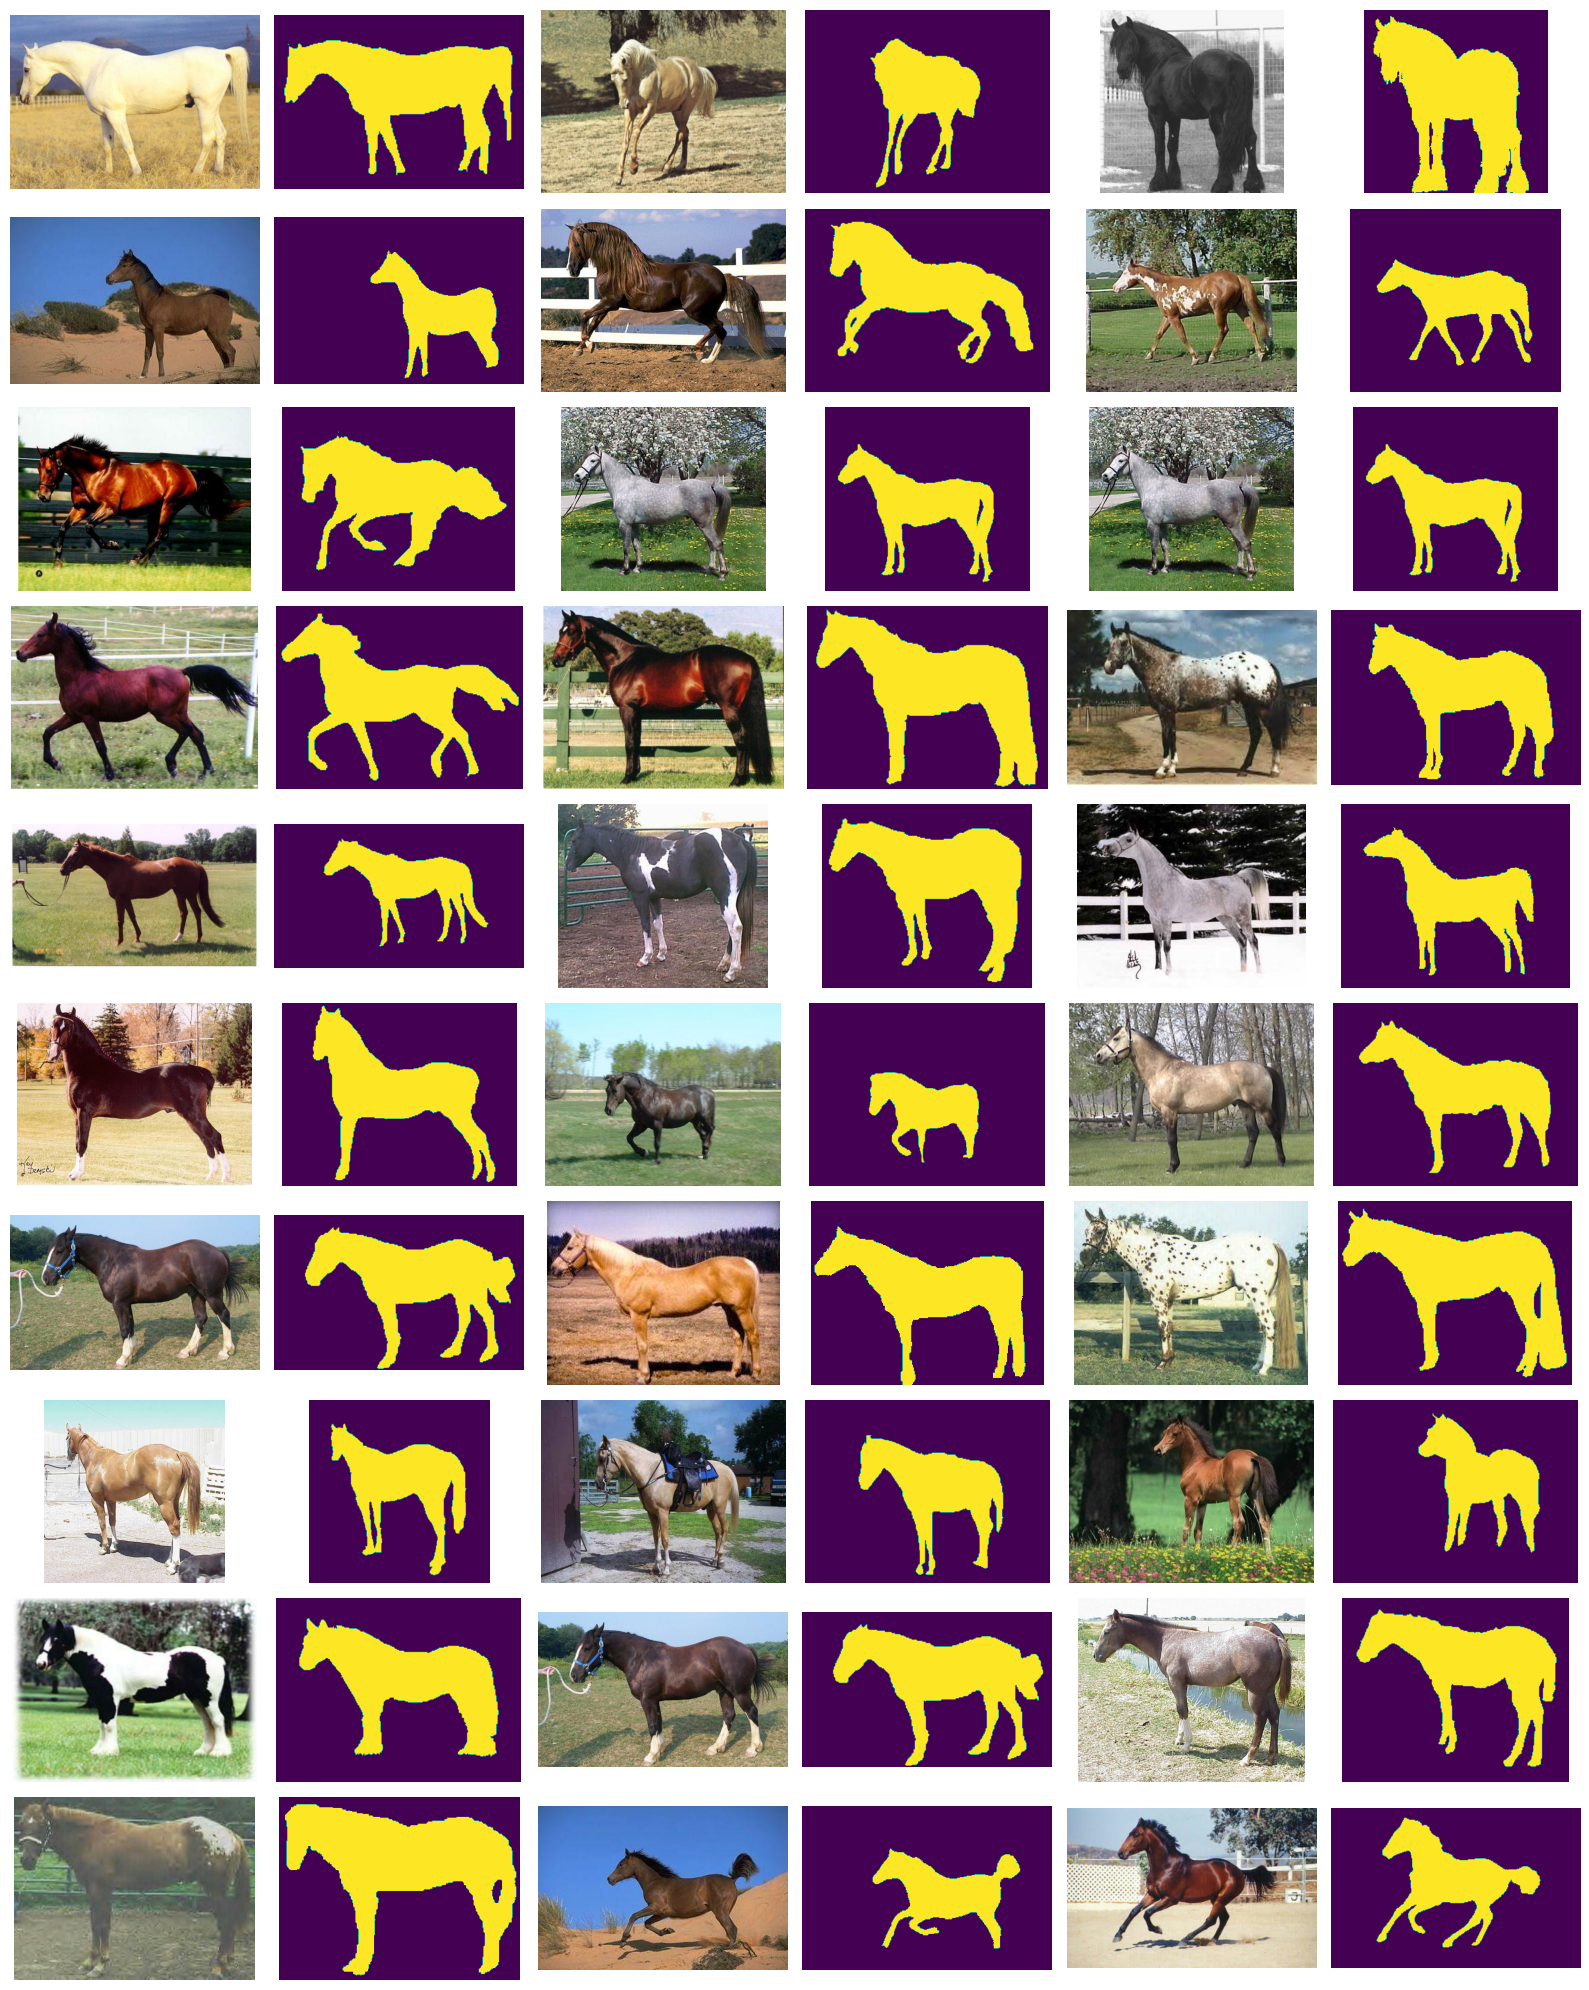

In [3]:
# Create a 10x4 grid of subplots
fig, axes = plt.subplots(10, 6, figsize=(16,20))  # Adjust size to fit

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop over images and axes
i = 0
for l in range(30):
    ax = axes[i]
    ax.imshow(Train_Im[l].astype(int), cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1
    ax = axes[i]
    ax.imshow(Train_Mask[l], cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1


plt.tight_layout()
plt.show()
    

# Compute Pixel-Wise Covariance Features

In [4]:
import sys
sys.path.append('/home/dmitrij/Documents/HDE_Code_Folder/Feature_Extraction_Lib/src/Covariance_Descriptor/')
from Feature_Extractor import Features



In [5]:


Train_Descripor_pd = []
for l in range(1):
    Cov_Features = Features(Train_Im[l],Scale_List=[7,11,13,15],filter_list = 'x,z,H,S,V,Ix,Iz,Izz,Ixx,Ixz,|gradI|,E',chanels_num=3,pad_x=7,pad_y=7,sigma_E=0.05)
    Train_Descripor_pd.append(Cov_Features.covariance_from_fvec())
features_dim = len(Cov_Features.filter_list)

' Add Regularization to avoid numerical instabilities '

for l in range(1):
        Train_Descripor_pd[l][:,:,:,:] += 0.01*np.eye(Cov_Features.f_vec.shape[2])

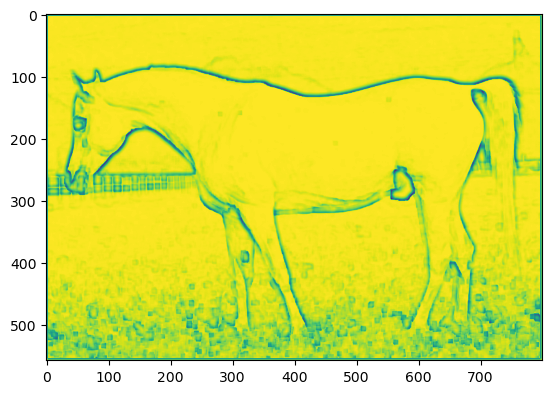

In [6]:
plt.imshow(Cov_Features.f_vec[:,:,11])

/tmp/ipykernel_693662/3069381824.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


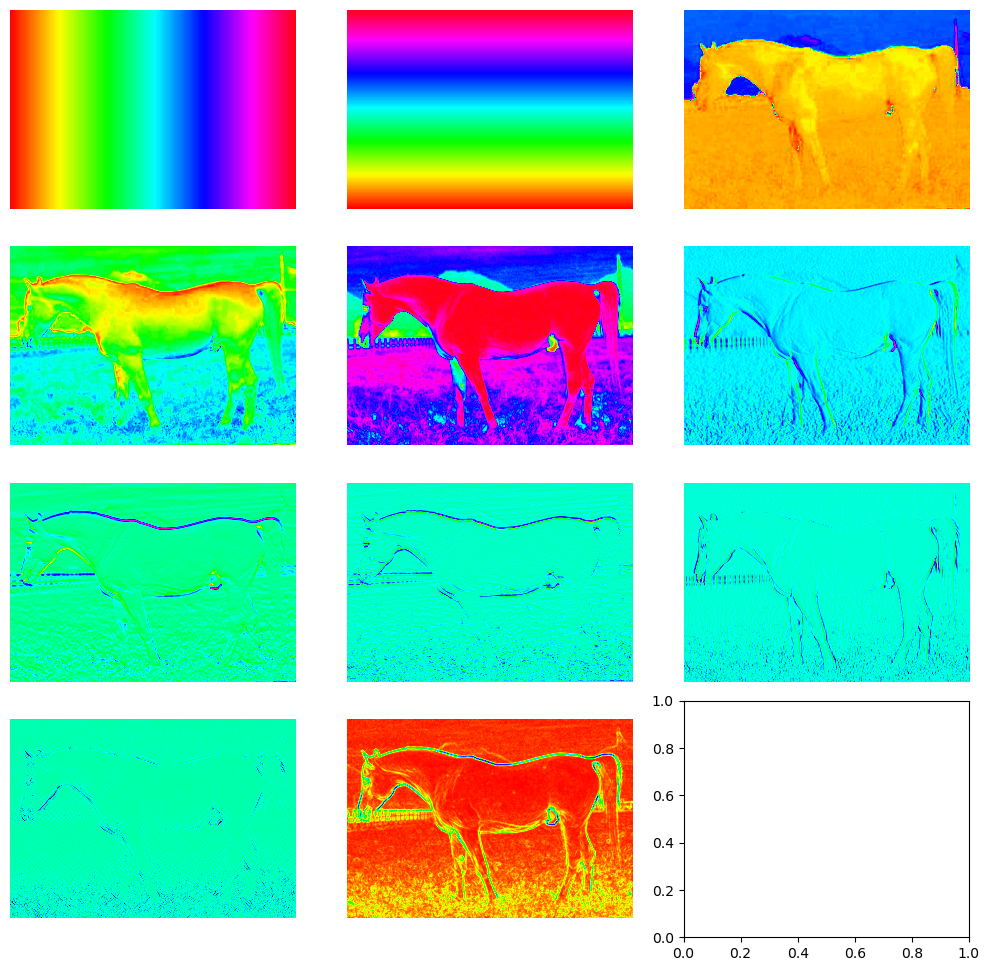

In [7]:
fig,axes = plt.subplots(4,3,figsize = (10,10))
axes = axes.flatten()
for k in range(11):
    ax = axes[k]
    ax.imshow(Cov_Features.f_vec[:,:,k], cmap='hsv')
    fig.tight_layout()
    ax.axis('off')


Each RGB-valued data is mapped pixel-wise to the vector
\begin{gather}
f : \mathcal{D} \to \mathbb{R}^{10} \\
v \mapsto
(R(v),
G(v),
B(v),
I(v),
\nabla_x I(v),
\nabla_y I(v),
\nabla_z I(v),
\sqrt{2}\nabla_{xy} I(v),
\dots,
\nabla_{zz} I(v)
)^\top\ .
\end{gather}
from the intensities $I(v)$ as well as first- and
second-order responses of derivative filters capturing information from larger
scales. To improve the segmentation accuracy
we combine the derivative filter
responses from various scales by first
normalizing the derivatives of the input volume $I(v)$ at every scale $\sigma_s$
through convolution by a 1D window:
\begin{align}
	\nabla_x \tilde{I}_{\sigma_s}(v) = \sigma_s^{2}\frac{\partial}{\partial
	x}\tilde{G}(v,\sigma_s)
\end{align}
where $\tilde{G}(v,\sigma_s)$ is an approximation to a Gaussian window
$\big(G(v,\sigma_s)\ast I\big)(v)$ at scale $\sigma_s$ as in detail described
in
by taking local maxima over scales
\begin{align}
	\nabla_x \tilde{I}(v) = \max_{\sigma_s} \nabla_x \tilde{I}_{\sigma_s}(v),
\end{align}

For each neighborhood, on an image graph we the compute the regularized *region covariance descriptor*
\begin{align}
S_i := \sum_{j \in \mathcal{N}_i}\theta_{ij}
(f_j-\overline{f_i})(f_j-\overline{f_i})^T + \epsilon I, \quad
\overline{f_i} = \sum_{k \in \mathcal{N}_i}\theta_{ik}f_k,
\end{align}

# Extract Covariance Descriptors 

In [47]:
from Geometric_Kmeans import Return_Descriptors
Num_Cluster = 20
Horse_Descriptors = (Return_Descriptors(Train_Descripor_pd[0:1],Train_Mask[0:1],1,K = Num_Cluster))


Extract Descriptors from Data_Sample ****0*****
Extract Descriptors from Data_Sample ****0*****
Finished in ---44.299561738967896---


In [19]:
Train_Descripor_pd[0].shape

(509, 575, 31, 31)

In [54]:
' Load Unseen data '

Ind = np.random.choice(327,10)
Test_Im = []
for im_num in Ind:
    if len(str(im_num)) == 3:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Test_Im.append(Im)
    elif len(str(im_num)) == 2:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse0'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Test_Im.append(Im)
    elif len(str(im_num)) == 1:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse00'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Test_Im.append(Im)


Test_Im_Lifted = []
for l in range(10):
    Cov_Features = Features(Test_Im[l],chanels_num=3)
    Test_Im_Lifted.append(Cov_Features.covariance_from_fvec())

In [25]:
Horse_Descriptors.shape

(2, 30, 13, 64)

In [ ]:
for l in range(10):
        Test_Im_Lifted[l][:,:,:,:] += 0.05*np.eye(features_dim)

In [56]:
Train_Descripor_pd[0].shape

(314, 350, 12, 12)

In [58]:
' Reshape Descriptors as input for distance computation '

features_dim = 12
Im_num = 0
Prot_Test = Horse_Descriptors[:,:,:,:].reshape(2,Num_Cluster,features_dim*features_dim).reshape(2,Num_Cluster,features_dim,features_dim)

In [59]:
from Stein_Divergence_Mean import Log_Euclid_Distance,divergence_stein
from Descriptor_Cython.Geometric_Mean_Utils import distance_Riemmann
from Descriptor_Cython.cython_distance import distance_stein

' Compute the distance using Stein divergence ' 

#Test = np.squeeze(Log_Euclid_Distance(Train_Descripor_pd[10][:,:,None,:,:],Prot_Test))
#Test = np.squeeze(distance_Riemmann(Train_Descripor_pd[10][:,:,:,0:40].reshape(-1,9,9),Prot_Test[1,:,:,:]))
Im_num = 0
Test_1 = distance_stein(np.asarray(Train_Descripor_pd[Im_num][:,:,:,:]).reshape(-1,features_dim,features_dim),Prot_Test[0,:,:,:])
Test_2 = distance_stein(np.asarray(Train_Descripor_pd[Im_num][:,:,:,:]).reshape(-1,features_dim,features_dim),Prot_Test[1,:,:,:])

(-0.5, 349.5, 313.5, -0.5)

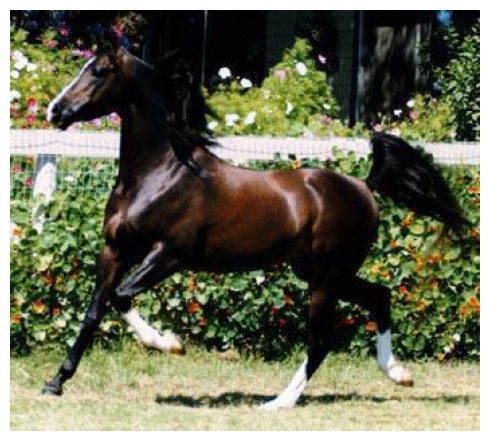

In [60]:
plt.imshow(Train_Im[Im_num].astype(int))
plt.tight_layout()
plt.axis('off')

In [61]:
Test_1 = Test_1.reshape(Train_Im[Im_num].shape[0],Train_Im[Im_num].shape[1],1*Num_Cluster)
Test_2 = Test_2.reshape(Train_Im[Im_num].shape[0],Train_Im[Im_num].shape[1],1*Num_Cluster)

In [62]:
Seg_1 = np.min(Test_1[:,:,:],axis = 2)

In [63]:
Seg_2 = np.min(Test_2[:,:,:],axis = 2)

In [64]:
Im_Seg = np.zeros((Test_1.shape[0],Test_1.shape[1],2))

In [65]:
Im_Seg[:,:,0] = Seg_1
Im_Seg[:,:,1] = Seg_2

In [66]:
np.argmin(Im_Seg,axis = 2).max()

1

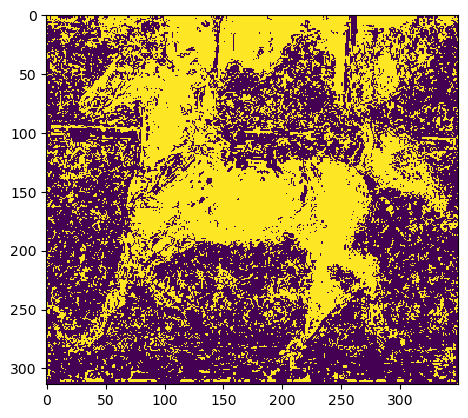

In [67]:
plt.imshow(np.argmin(Im_Seg,axis = 2),interpolation='none')

In [108]:
np.argmin(Im_Seg,axis = 2).shape

(496, 664)

In [122]:
Test_2

array([[[0.0164929 , 0.76865284, 0.084296  , ..., 0.77811754,
         0.11830616, 0.50127832],
        [0.01649174, 0.76865284, 0.08429549, ..., 0.77811373,
         0.11830234, 0.50127865],
        [0.01649044, 0.76865295, 0.08429529, ..., 0.77810936,
         0.11829782, 0.50127952],
        ...,
        [0.01639838, 0.76867475, 0.08336043, ..., 0.77784713,
         0.11808356, 0.50115799],
        [0.01641031, 0.76867601, 0.08359428, ..., 0.77791134,
         0.1181063 , 0.50115318],
        [0.01648432, 0.76869875, 0.08411916, ..., 0.77809165,
         0.11829954, 0.50125436]],

       [[0.01649293, 0.76865295, 0.08429632, ..., 0.7781176 ,
         0.11830611, 0.50127873],
        [0.01649182, 0.76865306, 0.08429622, ..., 0.77811389,
         0.11830225, 0.50127957],
        [0.01649004, 0.76865314, 0.08429569, ..., 0.77810799,
         0.11829625, 0.50128043],
        ...,
        [0.01630906, 0.7685172 , 0.0833684 , ..., 0.77766221,
         0.11786271, 0.50078954],
        [0.0

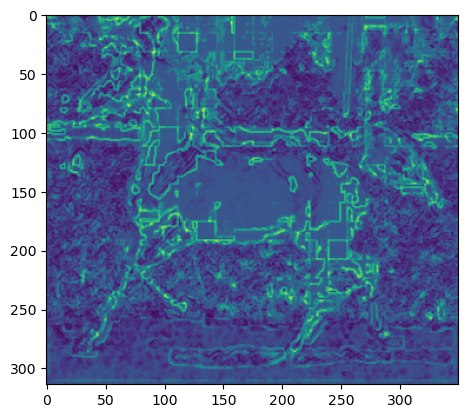

In [72]:
plt.imshow(np.min(Test_2[:,:,2:3],axis = 2))

In [441]:
from scipy.ndimage.filters import convolve
from skimage.util import view_as_windows


mask = np.array([0.299,0.587,0.114])/255.0
Test_Im = np.einsum('ijk,k->ij',Train_Im[2],mask)

Mask_dim_x = 11
Mask_dim_y = 11
N = (Mask_dim_x*Mask_dim_y)
Mask = np.ones((Mask_dim_x,Mask_dim_y))/N

Res_x = 1/Test_Im.shape[0]
Res_y = 1/Test_Im.shape[1]


Im_pred_vec = np.zeros((*Test_Im.shape,3))
Im_pred_vec_mean = np.zeros((*Test_Im.shape,3))
Im_pred_vec[:,:,2] = Test_Im[:,:]
Im_pred_vec[:,:,0:2] = np.moveaxis(np.array(np.indices((Im_pred_vec.shape[0:2])),dtype = np.float32),0,-1)
' Add Resolution to the indices ' 
Im_pred_vec[:,:,0:2] = np.einsum("ijk,k->ijk",Im_pred_vec[:,:,0:2],np.array([Res_x,Res_y]))
Im_pred_vec_mean = convolve(Im_pred_vec,Mask[:,:,None])

Cov_Mat = np.zeros((*Test_Im.shape,3,3))
for i in range(3):
    for j in range(i+1):
        Cov_Mat[:,:,i,j] = (N)*convolve(Im_pred_vec[:,:,i]*Im_pred_vec[:,:,j],Mask[:,:])-Im_pred_vec[:,:,i]*\
            Im_pred_vec_mean[:,:,j]-Im_pred_vec[:,:,j]*Im_pred_vec_mean[:,:,i] \
            +Im_pred_vec_mean[:,:,i]*Im_pred_vec_mean[:,:,j]
        Cov_Mat[:,:,j,i] = Cov_Mat[:,:,i,j]

N_space,T_space,_ = np.split(np.linalg.eigh(Cov_Mat)[1],(1,3),axis = 3)



" Weingarten_Map "

W_Matrix = np.zeros((Cov_Mat.shape[0],Cov_Mat.shape[1],2,2))
N_space =  np.squeeze(N_space)

sigma = 0.1
Y_shift = (Mask_dim_x+1)//2
X_shift = (Mask_dim_y+1)//2
for k in range(Cov_Mat.shape[0]):
    for j in range(Cov_Mat.shape[1]):
        #print(k)
        X_diff = Im_pred_vec[max(k-X_shift,0):k+X_shift,max(j-Y_shift,0):j+Y_shift,:].reshape(-1,3)-Im_pred_vec[k,j,:]
        Delta_k = T_space[k,j,:,:].T@X_diff.T
        Normals = N_space[max(k-X_shift,0):k+X_shift,max(j-Y_shift,0):j+Y_shift,:]
        Scalar_Mat = (N_space[max(k-X_shift,0):k+X_shift,max(j-Y_shift,0):j+Y_shift,:]@N_space[k,j,:])
        Theta_k = T_space[k,j,:,:].T@(Normals*Scalar_Mat[:,:,None]-N_space[k,j,:]).reshape(-1,3).T
        Diag_W = np.diag(np.exp(-np.linalg.norm(X_diff,axis=1)/(sigma))/sigma)
        W_Matrix[k,j,:,:] = -(Theta_k@Diag_W@Delta_k.T)@(np.linalg.inv((Delta_k@Diag_W@Delta_k.T)+0.05*np.eye(2)))
        W_Matrix[k,j,:,:] = 0.5*(W_Matrix[k,j,:,:]+W_Matrix[k,j,:,:].T)
        





/tmp/ipykernel_693662/1202469864.py:1: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


(-0.5, 287.5, 287.5, -0.5)

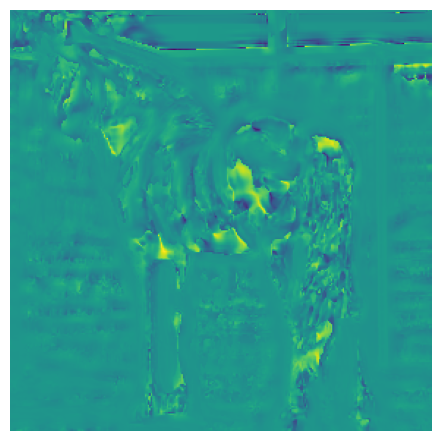

In [ ]:

plt.imshow(W_Matrix[:,:,0,0]+W_Matrix[:,:,1,1]) 
plt.tight_layout()
plt.axis("off")

AttributeError: 'Figure' object has no attribute 'axis'

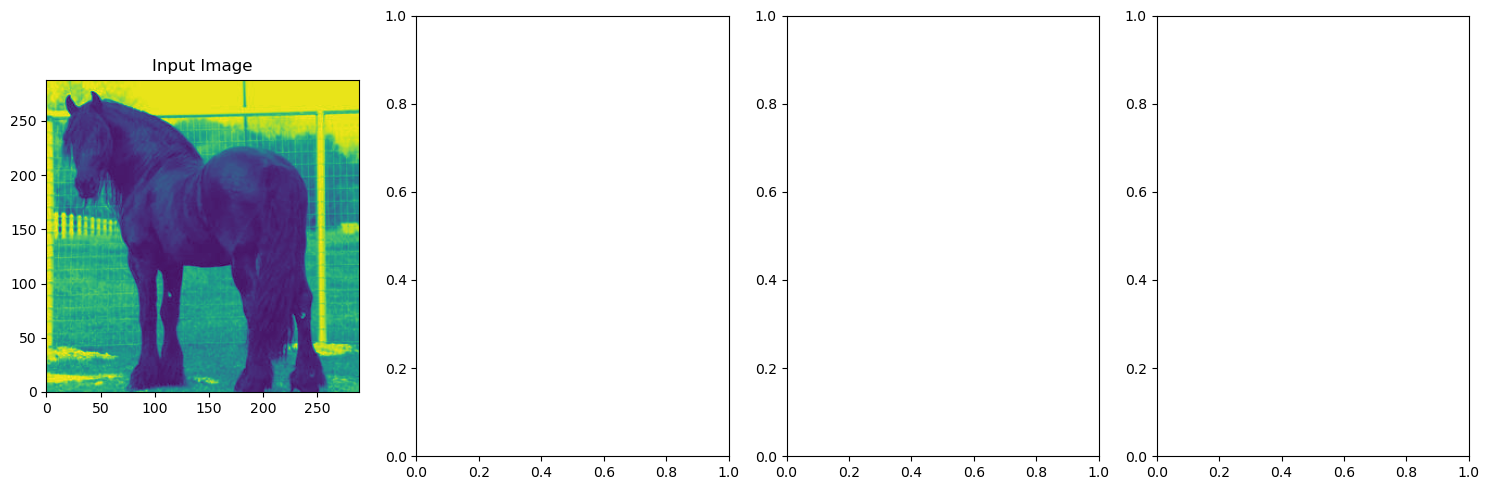

In [ ]:
nx,ny = W_Matrix.shape[0:2]
mean_curvature = np.zeros((nx, ny))
gaussian_curvature = np.zeros((nx, ny))
principal_curvatures = np.zeros((nx, ny, 2))  # Store kappa1, kappa2

# Compute eigenvalues and curvatures
for i in range(nx):
    for j in range(ny):
        W = W_Matrix[i, j]
        # Compute eigenvalues (principal curvatures)
        kappa1, kappa2 = np.linalg.eigvalsh(W)  # Use eigvalsh for symmetric matrices
        principal_curvatures[i, j] = [kappa1, kappa2]
        # Mean and Gaussian curvatures
        mean_curvature[i, j] = np.abs((kappa1 + kappa2)) / 2
        gaussian_curvature[i, j] = np.abs(kappa1 * kappa2)

# Plot results
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Origanal Image

im1 = axs[0].imshow(Test_Im, cmap='viridis', extent=[0, nx, 0, ny])
axs[0].set_title("Input Image")
plt.tight_layout()
plt.axis("off")

# Plot Mean Curvature
im1 = axs[1].imshow(mean_curvature, cmap='viridis', extent=[0, nx, 0, ny])
axs[1].set_title("Mean Curvature")
plt.tight_layout()
plt.axis("off")

# Plot Gaussian Curvature
im2 = axs[2].imshow(gaussian_curvature, cmap='plasma', extent=[0, nx, 0, ny])
axs[2].set_title("Gaussian Curvature")
plt.tight_layout()
plt.axis("off")

# Plot Principal Curvature Difference (|kappa1 - kappa2|)
principal_curvature_diff = np.abs(principal_curvatures[:, :, 0] + principal_curvatures[:, :, 1])
im3 = axs[3].imshow(principal_curvature_diff, cmap='cividis', extent=[0, nx, 0, ny])
axs[3].set_title("Principal Curvature")
plt.tight_layout()
plt.axis("off")
plt.show()

(558, 800, 3)

In [443]:
Curv_1 = np.linalg.eigh(W_Matrix)[0][:,:,0]
Curv_1[Curv_1>10] = 1
Curv_1 = Curv_1/Curv_1.max()
Curv_2 = np.linalg.eigh(W_Matrix)[0][:,:,1]
Curv_2[Curv_2>10] = 1
Curv_2 = Curv_2/Curv_2.max()

# Deep Features 

In [ ]:
i

[784, 627, 392, 156]

In [87]:
28*28*0.2

156.8

In [80]:
A[:-1]



array([0.38031176, 0.73609096, 0.07778641, 0.15679776, 0.68130705,
       0.44286497, 0.91484147])